In [ ]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
file_path = "https://raw.githubusercontent.com/prasertcbs/basic-dataset/refs/heads/master/Loan-Approval-Prediction.csv"
df = pd.read_csv(file_path)
# Display first few rows to understand the structure of the dataset
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Removing the 'Loan_ID' column as it is not a useful feature
df.drop(columns=['Loan_ID'], inplace=True)
# Verifying the column is removed
df


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#datatypes
df.dtypes

,0
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


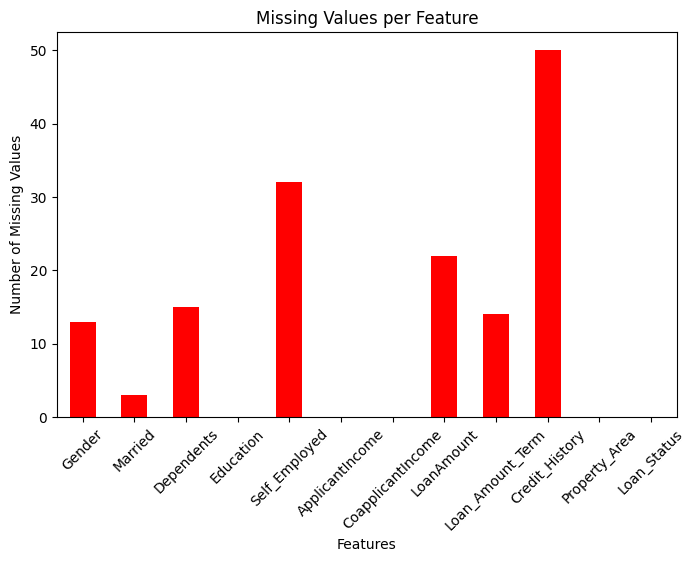

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [ ]:
# Step 3: Data Understanding

# Checking dataset information
df_info = df.info()

# Checking statistical summary
df_description = df.describe()

# Identifying missing values
missing_values = df.isnull().sum()

# Visualizing Missing Values per Feature
plt.figure(figsize=(8, 5))
missing_values.plot(kind='bar', color='red')
plt.title("Missing Values per Feature")
plt.xlabel("Features")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45)
plt.show()

# Displaying missing values count
missing_values


In [ ]:
# Step 4: Handling Missing Values

# Handling Missing Values Numerical columns: Using median because it is less affected by outliers
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

# Handling Missing Values Categorical columns: Using mode because it represents the most common value
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

# Verifying missing values are handled
df.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
# unique valuve of gender, married, dependents,self_employed
print(df['Gender'].unique())
print(df['Married'].unique())
print(df['Dependents'].unique())
print(df['Self_Employed'].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['No' 'Yes' nan]


In [ ]:
df["Dependents"]=df["Dependents"].replace("3+","3")
print(df['Dependents'].unique())

['0' '1' '2' '3' nan]


In [ ]:
#value count of Gender,married,selfemployed,dependent give in print
print(df["Gender"].value_counts())
print(df["Married"].value_counts())
print(df["Self_Employed"].value_counts())
print(df["Dependents"].value_counts())

Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Yes    398
No     213
Name: count, dtype: int64
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Dependents
0    345
1    102
2    101
3     51
Name: count, dtype: int64


In [ ]:
#fill the null value in Gender="Female",married="No",selfemployed="yes",dependent="3"
df.update(df[["Gender", "Married", "Self_Employed", "Dependents"]].fillna({"Gender": "Female",
                                                                            "Married": "No",
                                                                            "Self_Employed": "Yes",
                                                                            "Dependents": "3"}))
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
# unique valuve of gender, married, dependents,self_employed
print(df['Gender'].unique())
print(df['Married'].unique())
print(df['Dependents'].unique())
print(df['Self_Employed'].unique())

['Male' 'Female']
['No' 'Yes']
['0' '1' '2' '3']
['No' 'Yes']


In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
# Step 5: Removing Duplicate Records
# Dropping duplicate rows from the dataset (if any)
df.drop_duplicates(inplace=True)
df.duplicated().sum()


np.int64(0)

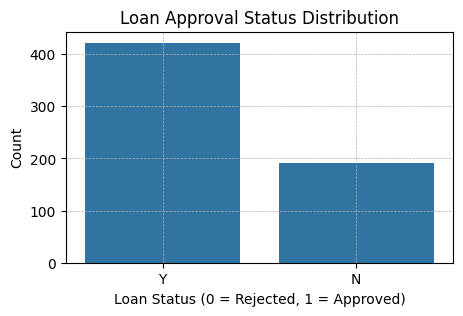

In [ ]:
# Step 6: Final Code for Basic Bar Graphs and Pie Charts
# Setting common figure size and grid lines for all graphs
fig_size = (5, 3)

# 1. Bar Chart - Loan Status Distribution
plt.figure(figsize=(5, 3))
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Approval Status Distribution')
plt.xlabel('Loan Status (0 = Rejected, 1 = Approved)')
plt.ylabel('Count')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()



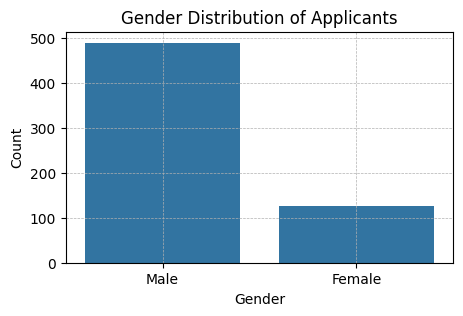

In [ ]:
# 2. Bar Chart - Gender Distribution
plt.figure(figsize=fig_size)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution of Applicants')
plt.ylabel('Count')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()



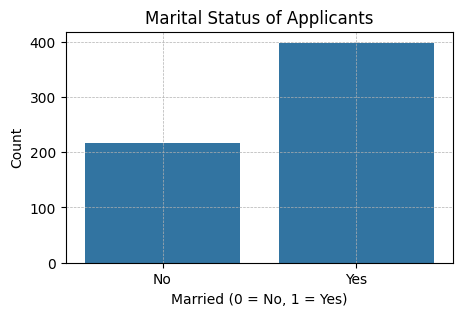

In [ ]:
# 3. Bar Chart - Married Status Distribution
plt.figure(figsize=fig_size)
sns.countplot(x='Married', data=df)
plt.title('Marital Status of Applicants')
plt.xlabel('Married (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()



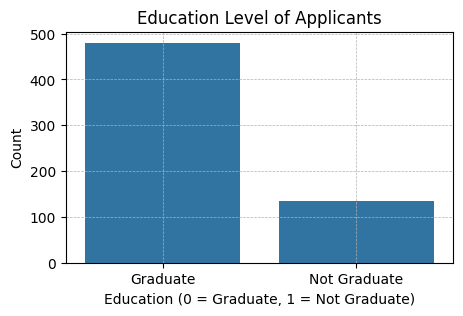

In [ ]:
# 4. Bar Chart - Education Level Distribution
plt.figure(figsize=fig_size)
sns.countplot(x='Education', data=df)
plt.title('Education Level of Applicants')
plt.xlabel('Education (0 = Graduate, 1 = Not Graduate)')
plt.ylabel('Count')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()



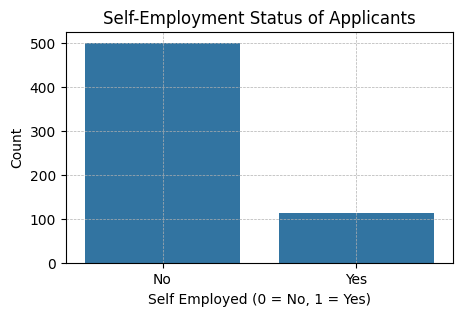

In [ ]:
# 5. Bar Chart - Self Employment Status
plt.figure(figsize=fig_size)
sns.countplot(x='Self_Employed', data=df)
plt.title('Self-Employment Status of Applicants')
plt.xlabel('Self Employed (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()



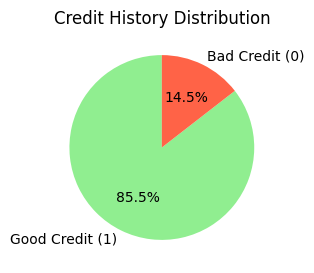

In [ ]:
# 7. Pie Chart - Credit History (Ordinal Data)
plt.figure(figsize=fig_size)
df['Credit_History'].value_counts().plot.pie(
    autopct='%1.1f%%', colors=['lightgreen', 'tomato'],
    startangle=90,
    labels=['Good Credit (1)', 'Bad Credit (0)'])
plt.title('Credit History Distribution')
plt.ylabel('')
plt.show()

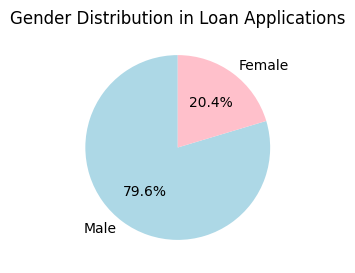

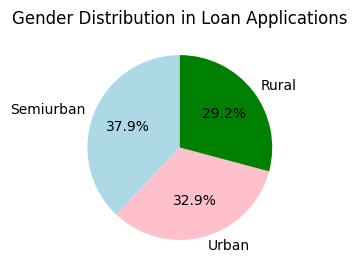

In [ ]:
# Displaying the remaining correct graphs

# 7. Pie Chart - Gender Distribution in Dataset
plt.figure(figsize=fig_size)
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'pink'], startangle=90, labels=['Male', 'Female'])
plt.title('Gender Distribution in Loan Applications')
plt.ylabel('')
plt.show()

# 7. Pie Chart - Gender Distribution in Dataset
plt.figure(figsize=fig_size)
df['Property_Area'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'pink',"green"], startangle=90,)
plt.title('Gender Distribution in Loan Applications')
plt.ylabel('')
plt.show()

In [ ]:
# understanding the distribution of the data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


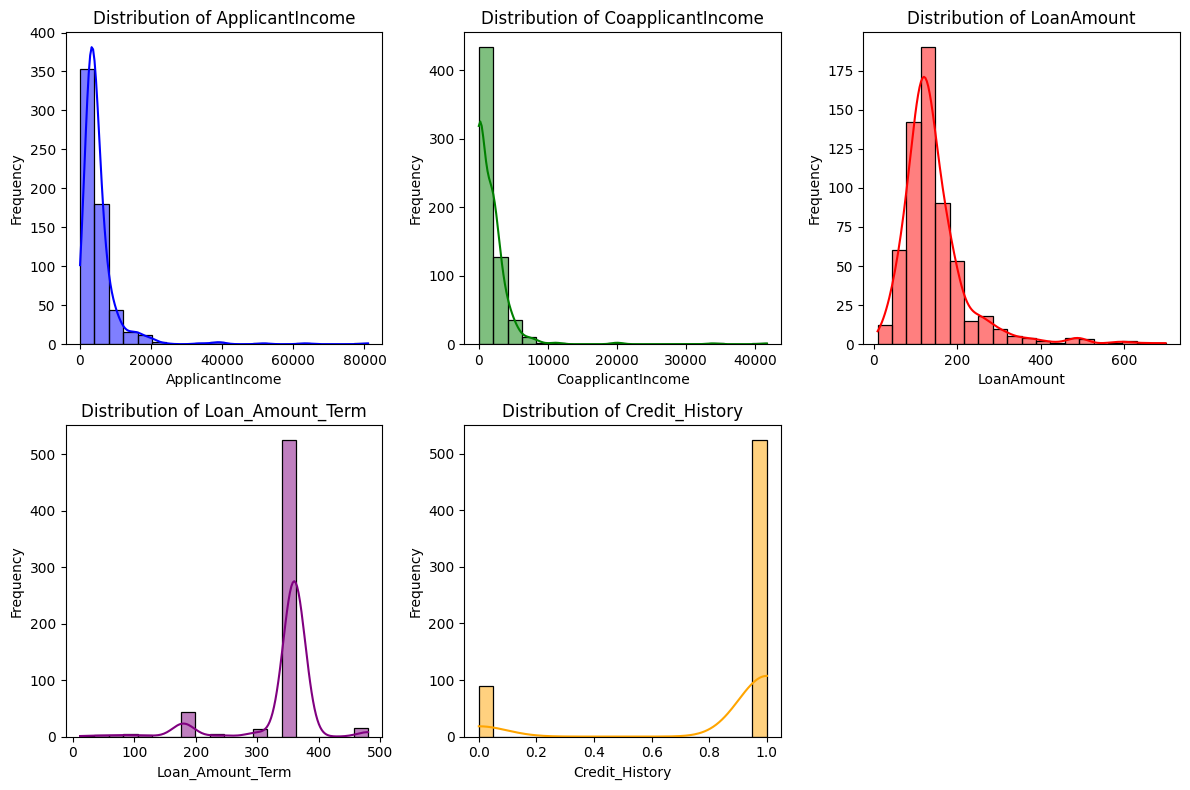

In [ ]:
# Creating # Creating distribution plots for all continuous features with different colors
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Define the continuous features
continuous_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'] # Assuming these are your continuous features

plt.figure(figsize=(12,8))
for i, (feature, color) in enumerate(zip(continuous_features, colors), 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], bins=20, kde=True, color=color)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
cdf= df.sort_values(by=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], ascending=False)
cdf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,Male,Yes,3,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
333,Male,Yes,0,Graduate,Yes,63337,0.0,490.0,180.0,1.0,Urban,Y
171,Female,Yes,3,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
155,Male,Yes,3,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
185,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
188,Female,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
500,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y
600,Female,No,3,Graduate,Yes,416,41667.0,350.0,180.0,1.0,Urban,N
468,Female,Yes,2,Not Graduate,Yes,210,2917.0,98.0,360.0,1.0,Semiurban,Y


In [ ]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Applying IQR method to remove outliers and sort
dff = df.sort_values(by=['ApplicantIncome'], ascending=False)#sort
df_cleaned = remove_outliers_iqr(dff, 'ApplicantIncome')#outlier
dff2 = df_cleaned.sort_values(by=['CoapplicantIncome'], ascending=False)#sort
df_cleane = remove_outliers_iqr(dff2, 'CoapplicantIncome')#outlier
dff3 = df_cleane.sort_values(by=['LoanAmount'], ascending=False)#sort
df_clean = remove_outliers_iqr(dff3, 'LoanAmount')#outlier

# Check the new shape of the cleaned dataset
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

# Display first few rows of cleaned data
df_clean.head()

Original dataset shape: (614, 12)
Cleaned dataset shape: (564, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
361,Male,Yes,2,Graduate,No,5000,3667.0,236.0,360.0,1.0,Semiurban,Y
476,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,Y
350,Male,Yes,0,Graduate,No,9083,0.0,228.0,360.0,1.0,Semiurban,Y
148,Female,No,0,Graduate,No,10000,1666.0,225.0,360.0,1.0,Rural,N
412,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural,N


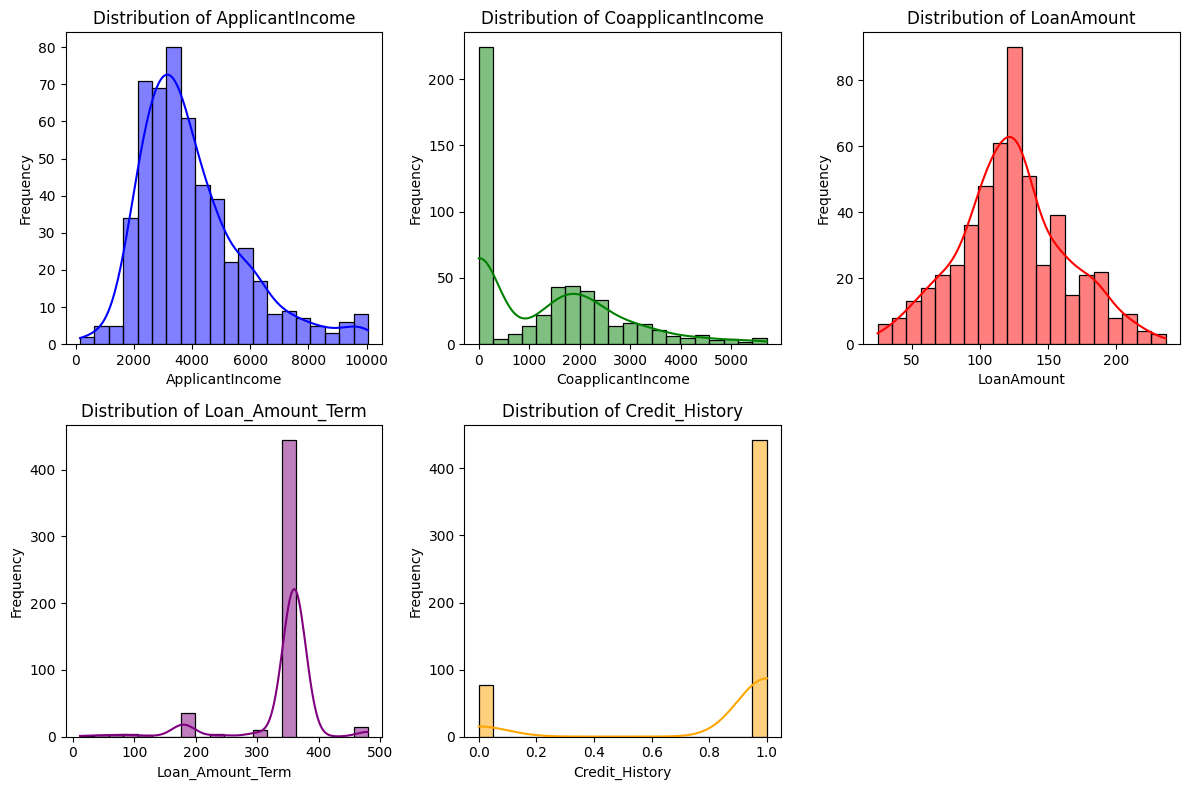

In [ ]:
# Creating # Creating distribution plots for all continuous features with different colors
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Define the continuous features
continuous_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'] # Assuming these are your continuous features

plt.figure(figsize=(12,8))
for i, (feature, color) in enumerate(zip(continuous_features, colors), 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_clean[feature], bins=20, kde=True, color=color)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
df_clean.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,520.000000,520.000000,520.000000,520.000000,520.000000
mean,3995.719231,1317.578692,123.651923,342.576923,0.851923
std,1794.687196,1397.402837,39.749892,65.618547,0.355518
min,150.000000,0.000000,25.000000,12.000000,0.000000
25%,2724.500000,0.000000,100.000000,360.000000,1.000000
50%,3590.500000,1293.500000,123.000000,360.000000,1.000000
75%,4772.750000,2191.000000,150.000000,360.000000,1.000000
max,10047.000000,5701.000000,236.000000,480.000000,1.000000


In [ ]:
# Function to keep only 90% of data
def keep_90_percent(data, column):
    lower_bound = data[column].quantile(0.05)  # 5th percentile
    upper_bound = data[column].quantile(0.95)  # 95th percentile
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
dfg=keep_90_percent(df_clean, 'ApplicantIncome')
dfg.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,468.00000,468.000000,468.000000,468.000000,468.000000
mean,3860.17735,1294.504103,121.788462,342.307692,0.848291
std,1327.43465,1377.652298,37.950719,66.803231,0.359123
min,1880.00000,0.000000,25.000000,12.000000,0.000000
25%,2875.75000,0.000000,99.750000,360.000000,1.000000
50%,3590.50000,1257.500000,121.500000,360.000000,1.000000
75%,4669.50000,2167.250000,143.250000,360.000000,1.000000
max,7660.00000,5701.000000,236.000000,480.000000,1.000000


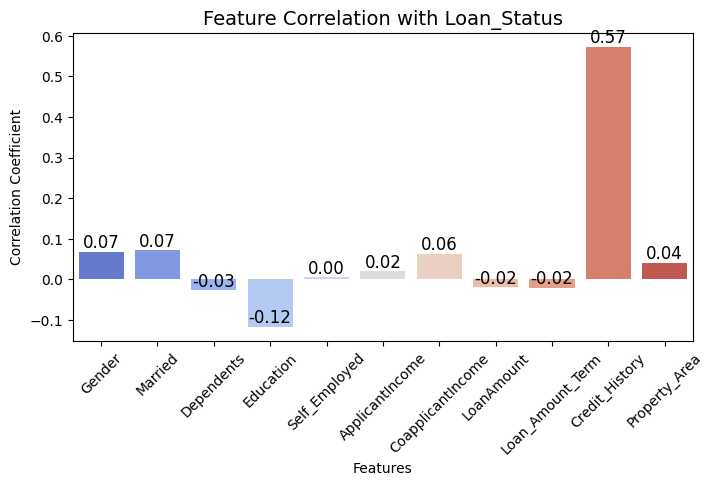

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation with the target variable (Loan_Status)
corr_with_target = df_clean.corr()['Loan_Status'].drop('Loan_Status')  # Drop self-correlation

# Plot a bar chart for correlation values
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=corr_with_target.index, y=corr_with_target.values, hue=corr_with_target.index, palette='coolwarm', legend=False)

# Annotate bars with correlation values
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

# Titles and Labels (Removed Emoji)
plt.xticks(rotation=45)
plt.title("Feature Correlation with Loan_Status", fontsize=14)
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Ensure df_clean is a deep copy to avoid the SettingWithCopyWarning
df_clean = df_clean.copy()

# List of categorical columns
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']

# Fill missing values with mode before encoding
for col in categorical_columns:
    df_clean.loc[:, col] = df_clean[col].fillna(df_clean[col].mode()[0])

# Apply Label Encoding safely using .loc
label_encoders = {}  # Store encoders for inverse transformation

for col in categorical_columns:
    le = LabelEncoder()
    df_clean.loc[:, col] = le.fit_transform(df_clean[col])  # Apply encoding using .loc
    label_encoders[col] = le  # Save encoder for later use

# Display first few rows after encoding
df_clean


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
361,1,1,2,0,0,5000,3667.0,236.0,360.0,1.0,1,1
476,1,1,2,0,0,6700,1750.0,230.0,300.0,1.0,1,1
350,1,1,0,0,0,9083,0.0,228.0,360.0,1.0,1,1
148,0,0,0,0,0,10000,1666.0,225.0,360.0,1.0,0,0
412,1,1,0,1,0,6096,0.0,218.0,360.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
270,0,0,0,0,0,3237,0.0,30.0,360.0,1.0,2,1
147,1,1,1,0,0,1538,1425.0,30.0,360.0,1.0,2,1
555,1,1,1,0,0,5468,1032.0,26.0,360.0,1.0,1,1
133,1,1,0,0,1,3459,0.0,25.0,120.0,1.0,1,1


In [ ]:
#uniqiue values
df_clean["Dependents"].unique()

array([2, 0, 1, 3], dtype=object)

In [ ]:
print(df_clean['Loan_Status'].unique())
print(df_clean['Loan_Status'].dtype)


[1 0]
object


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_clean['Loan_Status'] = le.fit_transform(df_clean['Loan_Status'])  # Converts 'Y' to 1, 'N' to 0


In [ ]:
df_clean.nunique()

,0
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,429
CoapplicantIncome,254
LoanAmount,148
Loan_Amount_Term,10
Credit_History,2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1️⃣ Define the target variable (y) and features (X)
X = df_clean.drop(columns=['Loan_Status'])  # Features
y = df_clean['Loan_Status']  # Target variable

# 2️⃣ Split the dataset into training & testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3️⃣ Standardize the numerical features (Scale for better model performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit & transform training data
X_test_scaled = scaler.transform(X_test)  # Transform test data

# 4️⃣ Initialize & Train the Model (KNN)
model = KNeighborsClassifier(n_neighbors=12)  # You can change 'n_neighbors' for tuning
model.fit(X_train_scaled, y_train)  # Model fitting

# 5️⃣ Make Predictions
y_pred = model.predict(X_test_scaled)

# 6️⃣ Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.4f}")  # Print accuracy
print("🔹 Classification Report:\n", classification_report(y_test, y_pred))

# 7️⃣ Predict on Training & Testing Data
y_train_pred = model.predict(X_train_scaled)  # Training predictions
y_test_pred = model.predict(X_test_scaled)  # Testing predictions

# 8️⃣ Calculate Training & Testing Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# 9️⃣ Display Results
print(f"🎯 Training Accuracy: {train_accuracy:.4f}")
print(f"🧪 Testing Accuracy: {test_accuracy:.4f}")

# 🔹 Display Classification Report for Testing Data
print("🔹 Classification Report (Testing Data):\n", classification_report(y_test, y_test_pred))


✅ Model Accuracy: 0.8077
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.41      0.57        32
           1       0.79      0.99      0.88        72

    accuracy                           0.81       104
   macro avg       0.86      0.70      0.72       104
weighted avg       0.83      0.81      0.78       104

🎯 Training Accuracy: 0.8341
🧪 Testing Accuracy: 0.8077
🔹 Classification Report (Testing Data):
               precision    recall  f1-score   support

           0       0.93      0.41      0.57        32
           1       0.79      0.99      0.88        72

    accuracy                           0.81       104
   macro avg       0.86      0.70      0.72       104
weighted avg       0.83      0.81      0.78       104



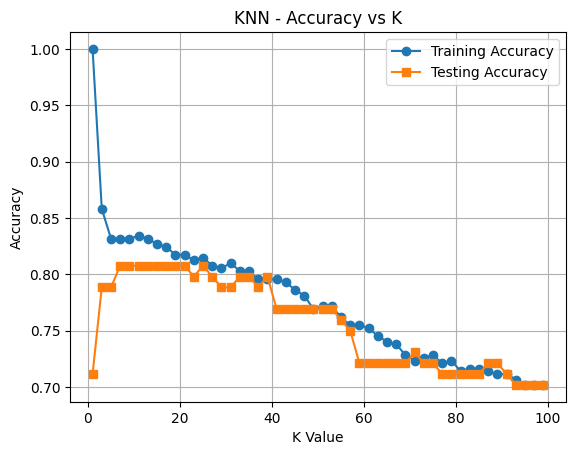

✅ Best K for KNN: 7
🎯 Highest Training Accuracy: 1.0000
🧪 Highest Testing Accuracy: 0.8077


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

train_accuracies = []
test_accuracies = []
k_values = range(1, 100, 2)  # Test odd K values from 1 to 29

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, model.predict(X_test_scaled))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plot Training vs Testing Accuracy
plt.plot(k_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Testing Accuracy', marker='s')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN - Accuracy vs K')
plt.legend()
plt.grid()
plt.show()

# Best K value
best_K = k_values[np.argmax(test_accuracies)]
print(f"✅ Best K for KNN: {best_K}")
print(f"🎯 Highest Training Accuracy: {max(train_accuracies):.4f}")
print(f"🧪 Highest Testing Accuracy: {max(test_accuracies):.4f}")

In [ ]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Mapping dictionary for categorical inputs
gender_mapping = {"Female": 0, "Male": 1}
married_mapping = {"No": 0, "Yes": 1}
dependents_mapping = {"None": 0, "One": 1, "Two": 2, "Three": 3,"Four": 4}
education_mapping = {"Graduate": 0, "Not Graduate": 1}
self_employed_mapping = {"No": 0, "Yes": 1}
credit_history_mapping = {"Bad": 0, "Good": 1}
property_area_mapping = {"Rural": 0, "Semiurban": 1, "Urban": 2}

# Dropdowns for categorical variables (with spacing)
gender_dropdown = widgets.Dropdown(options=gender_mapping.keys(), description="Gender:  ", style={'description_width': '150px'})
married_dropdown = widgets.Dropdown(options=married_mapping.keys(), description="Married:  ", style={'description_width': '150px'})
dependents_dropdown = widgets.Dropdown(options=dependents_mapping.keys(), description="Dependents:  ", style={'description_width': '150px'})
education_dropdown = widgets.Dropdown(options=education_mapping.keys(), description="Education:  ", style={'description_width': '150px'})
self_employed_dropdown = widgets.Dropdown(options=self_employed_mapping.keys(), description="Self Employed:  ", style={'description_width': '150px'})
credit_history_dropdown = widgets.Dropdown(options=credit_history_mapping.keys(), description="Credit History:  ", style={'description_width': '150px'})
property_area_dropdown = widgets.Dropdown(options=property_area_mapping.keys(), description="Property Area:  ", style={'description_width': '150px'})

# Numeric inputs with labels
applicant_income_input = widgets.FloatText(description="Applicant Income:  ", style={'description_width': '150px'})
coapplicant_income_input = widgets.FloatText(description="Coapplicant Income:  ", style={'description_width': '150px'})
loan_amount_input = widgets.FloatText(description="Loan Amount:  ", style={'description_width': '150px'})
loan_term_input = widgets.FloatText(description="Loan Term (days):  ", style={'description_width': '150px'})

# Prediction button
predict_button = widgets.Button(description="Check Loan Approval", button_style='success')
output_label = widgets.Output()

# Function to predict loan approval
def predict_loan_approval(b):
    with output_label:
        clear_output()

        # Convert dropdown selections to numeric values
        user_data = np.array([[gender_mapping[gender_dropdown.value],
                               married_mapping[married_dropdown.value],
                               dependents_mapping[dependents_dropdown.value],
                               education_mapping[education_dropdown.value],
                               self_employed_mapping[self_employed_dropdown.value],
                               applicant_income_input.value,
                               coapplicant_income_input.value,
                               loan_amount_input.value,
                               loan_term_input.value,
                               credit_history_mapping[credit_history_dropdown.value],
                               property_area_mapping[property_area_dropdown.value]]])

        # Standardizing the input
        user_data_scaled = scaler.transform(user_data)  # No error now!

        # Making prediction
        prediction = model.predict(user_data_scaled)

        # Display result
        result_text = "🎉 Loan Approved! ✅" if prediction[0] == 1 else "🚫 Loan Not Approved ❌"
        print(result_text)

# Link button click to function
predict_button.on_click(predict_loan_approval)

# Layout for better spacing
form_layout = widgets.VBox([
    gender_dropdown, married_dropdown, dependents_dropdown, education_dropdown,
    self_employed_dropdown, credit_history_dropdown, property_area_dropdown,
    applicant_income_input, coapplicant_income_input, loan_amount_input, loan_term_input,
    widgets.HTML("<br>"),  # Extra spacing
    predict_button, output_label
])

# Display form
display(form_layout)
